<a href="https://colab.research.google.com/github/carolinehagood/covid-project/blob/main/vaccine_data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EXPLORATORY DATA ANALYSIS OF U.S VACCINE RATE (2019- 2022)

In [52]:
import pandas as pd

#open and read csv file
url = "https://raw.githubusercontent.com/carolinehagood/covid-project/refs/heads/main/data/us-daily-covid-vaccine-doses-administered.csv"
df = pd.read_csv(url)
df.head(5)


,Entity,Code,Day,Daily doses administered (7-day rolling average)
0,Alabama,NaN,2020-01-13,5906
1,Alabama,NaN,2020-01-14,7083
2,Alabama,NaN,2020-01-15,7478
3,Alabama,NaN,2020-01-16,7498
4,Alabama,NaN,2020-01-17,7509


In [53]:
#drop column Code, since it is not relevant
df = df.drop(columns=['Code'])

#Rename state column and doses column for clarity and efficiency
df = df.rename(columns={'Entity': 'State', 'Daily doses administered (7-day rolling average)': 'Doses'})

In [54]:
df.head(5)

,State,Day,Doses
0,Alabama,2020-01-13,5906
1,Alabama,2020-01-14,7083
2,Alabama,2020-01-15,7478
3,Alabama,2020-01-16,7498
4,Alabama,2020-01-17,7509


In [55]:
#filter data to exclude data per state, and only include total national data for each day
df_filtered = df[df['State'] == 'United States']
df_filtered.head(5)

,State,Day,Doses
46060,United States,2019-12-21,57909
46061,United States,2019-12-22,127432
46062,United States,2019-12-23,150606
46063,United States,2019-12-24,191001
46064,United States,2019-12-25,215238


In [56]:
df_filtered = df_filtered.drop(columns=['State'])
df_filtered.head(5)

,Day,Doses
46060,2019-12-21,57909
46061,2019-12-22,127432
46062,2019-12-23,150606
46063,2019-12-24,191001
46064,2019-12-25,215238


In [57]:
df_filtered.isna().sum()

,0
Day,0
Doses,0


In [58]:
# What is the range of Day variable?
print(df_filtered['Day'].max())
print(df_filtered['Day'].min())

2022-05-09
2019-12-21


In [59]:
# Select year from day
df_filtered['Year']= df_filtered['Day'].str[:4]

In [60]:
# Convert Day to Date Time
df_filtered['Day']= pd.to_datetime(df_filtered['Day'])

# Extract the week number
df_filtered['Week'] = df_filtered['Day'].dt.isocalendar().week
df_filtered= df_filtered.sort_values('Week')
df_filtered

,Day,Doses,Year,Week
46444,2021-01-08,1239032,2021,1
46810,2022-01-09,201340,2022,1
46809,2022-01-08,197634,2022,1
46808,2022-01-07,193927,2022,1
46807,2022-01-06,190220,2022,1
...,...,...,...,...
46435,2020-12-30,1088925,2020,53
46434,2020-12-29,1062236,2020,53
46433,2020-12-28,1073608,2020,53
46436,2020-12-31,1115614,2020,53


In [61]:
# Filter by year and sort values by week
df_2020= df_filtered[df_filtered['Year']== '2020'].sort_values('Week')
df_2021= df_filtered[df_filtered['Year']== '2021'].sort_values('Week')
df_2022= df_filtered[df_filtered['Year']== '2022'].sort_values('Week')

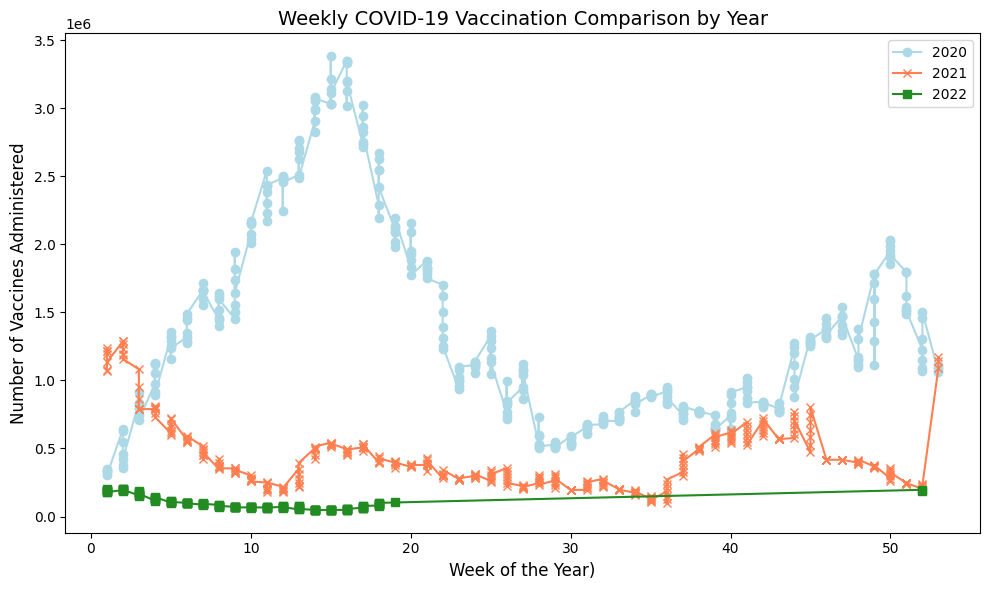

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot for 2020
plt.plot(df_2020['Week'], df_2020['Doses'], label='2020', color='lightblue', linestyle='-', marker='o')

# Plot for 2021
plt.plot(df_2021['Week'], df_2021['Doses'], label='2021', color='coral', linestyle='-', marker='x')

# Plot for 2022
plt.plot(df_2022['Week'], df_2022['Doses'], label='2022', color='forestgreen', linestyle='-', marker='s')

# Add titles and labels
plt.title('Weekly COVID-19 Vaccination Comparison by Year', fontsize=14)
plt.xlabel('Week of the Year)', fontsize=12)
plt.ylabel('Number of Vaccines Administered', fontsize=12)

# Add a legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [64]:
df_filtered.to_csv('clean_vaccine_data.csv')